In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import smartload.smartload as smart
from src import utils
import scipy.io

%matplotlib inline

%reload_ext autoreload
%autoreload 2


In [23]:
paths = utils.pathsetup('matchingsim')
files = glob.glob('/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/113021/*hmmblockfit_113021.mat')

In [52]:
params_all = []
for file in files:
    data = smart.loadmat(file)

    zstates = data['zstates']
    obs = data['obs']

    # Subsample
    offsets1 = []
    slopes1 = []
    lapses1 = []

    offsets2 = []
    slopes2 = []
    lapses2 = []

    for i in range(4):
        obs_singlez = obs[zstates == i]
        mean_singlez = np.mean(obs_singlez, axis=0)

        mean_singlez1 = np.mean(obs_singlez[:int(N/2),:], axis=0)
        mean_singlez2 = np.mean(obs_singlez[int(N/2):,:], axis=0)

        print(mean_singlez1)
        offset1, slope1, _, _, lapse1, _ = utils.fit_doublesigmoid_helper(mean_singlez1, 1 - mean_singlez1)
        offset2, slope2, _, _, lapse2, _ = utils.fit_doublesigmoid_helper(mean_singlez2, 1 - mean_singlez2)

    #     offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
        offsets1.append(offset1)
        offsets2.append(offset2)
        slopes1.append(slope1)
        slopes2.append(slope2)

        lapses1.append(lapse1)
        lapses2.append(lapse2)

    params[:,0] = offsets1
    params[:,1] = slopes1
    params[:,2] = lapses1
    params[:,3] = offsets2
    params[:,4] = slopes2
    params[:,5] = lapses2
    
    print(params)
    
    params_all.append(params)
        
    
    



[0.38636364 0.63636364 0.5        0.43181818 0.43181818 0.31818182
 0.36363636 0.65909091 0.40909091 0.59090909 0.40909091 0.5
 0.72727273 0.56818182 0.68181818]
[0.13636364 0.27272727 0.27272727 0.25       0.09090909 0.22727273
 0.20454545 0.31818182 0.36363636 0.29545455 0.27272727 0.18181818
 0.27272727 0.18181818 0.27272727]
[0.47727273 0.61363636 0.68181818 0.86363636 0.63636364 0.84090909
 0.72727273 0.90909091 0.90909091 0.95454545 0.86363636 0.90909091
 0.90909091 0.95454545 1.        ]


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


[0.17647059 0.52941176 0.70588235 0.88235294 0.82352941 0.88235294
 1.         1.         1.         1.         0.94117647 0.88235294
 1.         0.88235294 0.94117647]
[[-6.44331283e+00  5.15283974e-02  0.00000000e+00 -8.72545571e-01
   1.19615987e-02  0.00000000e+00]
 [-7.69291940e+01  1.66124899e-02  0.00000000e+00 -1.67953404e+03
   6.54484427e-03  2.24743470e-01]
 [ 0.00000000e+00  3.35931827e-01  4.85216855e-02 -6.16934075e-02
   3.16533568e-01  5.38887871e-02]
 [-1.11266101e+00  1.05347263e+00  4.55314982e-02 -1.50000000e+01
   1.08246734e-07  0.00000000e+00]]
[0.04545455 0.13636364 0.22727273 0.27272727 0.38636364 0.47727273
 0.59090909 0.81818182 0.75       0.72727273 0.95454545 1.
 1.         1.         1.        ]
[0.09090909 0.09090909 0.27272727 0.27272727 0.29545455 0.13636364
 0.25       0.29545455 0.22727273 0.36363636 0.13636364 0.36363636
 0.36363636 0.5        0.38636364]
[0.27272727 0.52272727 0.54545455 0.61363636 0.40909091 0.61363636
 0.45454545 0.29545455 0.8409

[0.41666667 0.80555556 0.83333333 0.83333333 0.86111111 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
[0.14285714 0.14285714 0.         0.14285714 0.         0.
 0.14285714 0.14285714 0.42857143 0.         0.14285714 0.
 0.14285714 0.         0.14285714]
[0.25       0.32142857 0.10714286 0.21428571 0.28571429 0.42857143
 0.60714286 0.85714286 0.85714286 0.92857143 1.         1.
 0.92857143 0.92857143 0.78571429]
[[-1.71240883e+00  8.14031421e-01  4.41424650e-01 -1.20916575e+01
   1.00955417e-01  0.00000000e+00]
 [ 0.00000000e+00  7.26219115e-01  1.79226785e-03 -1.50000000e+01
   1.08246734e-07  0.00000000e+00]
 [-6.34915808e+02  9.61477421e-03  1.02524367e-01 -1.50000000e+01
   1.08246734e-07  0.00000000e+00]
 [-5.19378387e+00  9.70933639e-01  1.08772971e-01 -1.50000000e+01
   1.08246734e-07  0.00000000e+00]]
[0.06818182 0.52272727 0.63636364 0.81818182 0.90909091 0.95454545
 1.         1.         1.         1.         1.         1.
 1

/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:320: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


[0.13636364 0.27272727 0.36363636 0.54545455 0.72727273 0.86363636
 1.         1.         1.         1.         1.         1.
 0.90909091 1.         1.        ]
[0.27272727 0.36363636 0.54545455 0.63636364 0.54545455 0.63636364
 0.63636364 0.77272727 0.77272727 0.72727273 0.77272727 0.86363636
 0.54545455 0.54545455 0.81818182]
[[-5.02720862e-01  1.63927807e+00  1.54473002e-03 -5.46058897e-01
   1.97075614e+00  5.53459659e-03]
 [-1.59532695e+01  5.33408302e-01  4.29476174e-04 -1.54854958e+01
   7.53061698e-02  3.78685616e-02]
 [-2.60047850e+00  7.49080929e-01  0.00000000e+00 -3.11289786e+00
   7.41996692e-01  0.00000000e+00]
 [-2.29657337e+00  6.96915444e-01  2.73458991e-01 -7.48605232e-01
   1.68106959e+00  2.56950568e-01]]
[0.09090909 0.18181818 0.36363636 0.31818182 0.45454545 0.63636364
 0.86363636 0.95454545 0.95454545 1.         0.95454545 1.
 1.         1.         0.95454545]
[0.04545455 0.09090909 0.04545455 0.25       0.27272727 0.22727273
 0.09090909 0.18181818 0.13636364 0.1

In [53]:
scipy.io.savemat(paths['expdatapath'] + '/113021/sigmoid_fit_all_113021b.mat', dict(files=files, params_all=params_all))

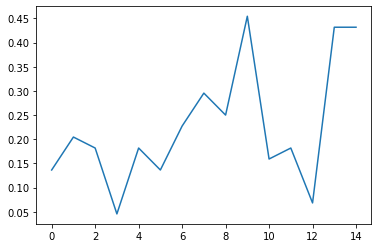

In [33]:
plt.plot(mean_singlez1)




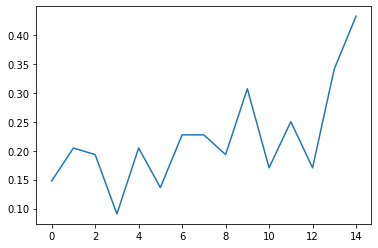

In [36]:
plt.plot(np.mean(obs_singlez, axis=0))


In [50]:
pR

array([-0.32023688,  0.        ,  0.05278729])

In [29]:
obs_singlez.shape



(44, 15)

In [ ]:
utils.

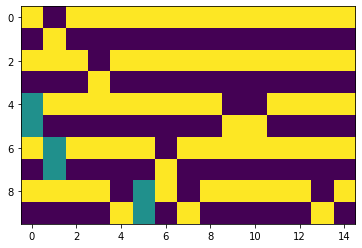

In [42]:
plt.imshow(obs_double[:10,:], aspect='auto')

In [46]:
params = np.zeros((4, 6)) * np.nan
    
# print(file)
data = smart.loadmat(files[2])

zstates = data['zstates']
obs = data['obs']

# Subsample
offsets1 = []
slopes1 = []
lapses1 = []

offsets2 = []
slopes2 = []
lapses2 = []

for i in range(4):
    obs_singlez = obs[zstates == i]
    mean_singlez = np.mean(obs_singlez, axis=0)
    
    mean_singlez1 = np.mean(obs_singlez[:int(N/2),:], axis=0)
    mean_singlez2 = np.mean(obs_singlez[int(N/2):,:], axis=0)

    print(mean_singlez1)
    offset1, slope1, _, _, lapse1, _ = utils.fit_doublesigmoid_helper(mean_singlez1, 1 - mean_singlez1)
    offset2, slope2, _, _, lapse2, _ = utils.fit_doublesigmoid_helper(mean_singlez2, 1 - mean_singlez2)
    
#     offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
    offsets1.append(offset1)
    offsets2.append(offset2)
    slopes1.append(slope1)
    slopes2.append(slope2)
    
    lapses1.append(lapse1)
    lapses2.append(lapse2)

params[:,0] = offsets1
params[:,1] = slopes1
params[:,2] = lapses1
params[:,3] = offsets2
params[:,4] = slopes2
params[:,5] = lapses2

print(params)

params_all.append(params)

[0.27272727 0.22727273 0.34090909 0.09090909 0.13636364 0.5
 0.61363636 0.68181818 0.63636364 0.86363636 0.90909091 0.86363636
 0.90909091 0.90909091 0.81818182]
[0.13636364 0.22727273 0.18181818 0.40909091 0.09090909 0.36363636
 0.13636364 0.27272727 0.22727273 0.22727273 0.22727273 0.22727273
 0.45454545 0.29545455 0.27272727]
[0.68181818 0.68181818 0.86363636 0.86363636 0.90909091 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
[0.27272727 0.63636364 0.36363636 0.54545455 0.54545455 0.45454545
 0.70454545 0.61363636 0.5        0.47727273 0.63636364 0.54545455
 0.45454545 0.61363636 0.59090909]
[[-5.62707674e+00  8.72454128e-01  1.53371558e-01 -5.75163391e+00
   3.05406958e-01  0.00000000e+00]
 [-3.03443739e+01  5.95309597e-02  8.55267580e-02 -3.44945819e+01
   4.11063552e-02  9.42096466e-03]
 [ 0.00000000e+00  7.20020110e-01  0.00000000e+00  0.00000000e+00
   9.79077732e-01  5.35590578e-02]
 [-2.90574854e+00  6.20840189e-01  4.2619522

In [51]:
params

array([[-5.62707674e+00,  8.72454128e-01,  1.53371558e-01,
        -5.75163391e+00,  3.05406958e-01,  0.00000000e+00],
       [-3.03443739e+01,  5.95309597e-02,  8.55267580e-02,
        -3.44945819e+01,  4.11063552e-02,  9.42096466e-03],
       [ 0.00000000e+00,  7.20020110e-01,  0.00000000e+00,
         0.00000000e+00,  9.79077732e-01,  5.35590578e-02],
       [-2.90574854e+00,  6.20840189e-01,  4.26195224e-01,
        -1.55753561e+00,  4.08745409e-01,  4.49018237e-01]])

In [16]:
obs_singlez = obs[zstates == 2]
mean_singlez = np.mean(obs_singlez, axis=0)
offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
# offsets.append(offset)
# slopes.append(slope)
# lapses.append(lapse)

In [21]:
utils.fit_doublesigmoid_helper(mean_singlez, 1-mean_singlez)

array([-13.85839917,   0.        , -13.85839917,   0.        ,
         0.5       ,   0.5       ])

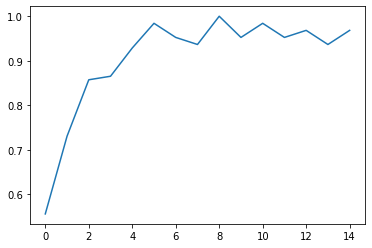

In [18]:
plt.plot(mean_singlez)

In [22]:
mean_singlez

[autoreload of src.utils failed: Traceback (most recent call last):
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 851, in exec_module
  File "<frozen importlib._bootstrap_external>", line 988, in get_code
  File "<frozen importlib._bootstrap_external>", line 918, in source_to_code
  File "<frozen importli

array([0.55555556, 0.73015873, 0.85714286, 0.86507937, 0.92857143,
       0.98412698, 0.95238095, 0.93650794, 1.        , 0.95238095,
       0.98412698, 0.95238095, 0.96825397, 0.93650794, 0.96825397])